# Exploratory Data Analysis on Uber Request Data

### Problem Statement:
- The given dataset consists of requests made
by users from Airport, City and whether the
demand was fulfilled.
- Problem observed in this Dataset is of
cancellation of requests and unavailability of
cabs at the given pickup points in the dataset.
- This issue affects the revenue of Uber and in
turn impacts the growth of the company.

### Source of the dataset: https://www.kaggle.com/datasets/anupammajhi/uber-request-data


In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the file
uber_df=pd.read_excel('Uber Request Data(copy).xlsx')

In [3]:
uber_df.sample(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
2016,1890,City,212.0,Trip Completed,2016-07-12 10:08:00,2016-07-12 11:16:00
4997,2485,Airport,NaN,No Cars Available,2016-07-12 20:50:00,NaT
142,1167,Airport,16.0,Trip Completed,2016-07-11 20:50:00,2016-07-11 21:52:00
3913,6608,Airport,259.0,Cancelled,2016-07-15 21:46:00,NaT
5054,2583,Airport,NaN,No Cars Available,2016-07-12 21:41:00,NaT


In [4]:
uber_df.shape

(6745, 6)

In [5]:
#check duplicate rows
uber_df.duplicated().sum() #no duplicate rows present

0

In [6]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


#### percentage of missing null values

In [7]:
perc_misnull=uber_df.isnull().sum()*100/len(uber_df)
perc_misnull


Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

#### Meaning of null entries in the dataset.

In [8]:
#Observation on Null entries
print('\033[1mCross checking Status of corresponding null values in Driver id column\033[0m\n')
n1=uber_df.loc[:,'Status']
print(n1.value_counts()*100/len(uber_df))
print("""\nObservation for null values in \033[1mDriver id\033[0m column:

'No Cars Available' status contributes to 39.288362% 
which is same as the percentage of null values in Driver id,
so these null values needs no treatment as this status 
was given because no Driver was present.

Observation for null values in \033[1mDrop timestamp\033[0m column:

Percentage of 'No Cars available' combined 'Cancelled' status gives 
58.028169% which is same as the null entries in Drop timestamp column. 
Hence, these null values in Drop timestamp column indicates 
no driver was present and the trip was cancelled respectively""")

Cross checking Status of corresponding null values in Driver id column

Trip Completed       41.971831
No Cars Available    39.288362
Cancelled            18.739807
Name: Status, dtype: float64

Observation for null values in Driver id column:

'No Cars Available' status contributes to 39.288362% 
which is same as the percentage of null values in Driver id,
so these null values needs no treatment as this status 
was given because no Driver was present.

Observation for null values in Drop timestamp column:

Percentage of 'No Cars available' combined 'Cancelled' status gives 
58.028169% which is same as the null entries in Drop timestamp column. 
Hence, these null values in Drop timestamp column indicates 
no driver was present and the trip was cancelled respectively


In [9]:
#Observe unique values in each column
print('Unique values in Status:',uber_df['Status'].unique())
print('\nUnique values in Pickup point:',uber_df['Pickup point'].unique())
print('\nUnique values(day) in Request timestamp:',uber_df['Request timestamp'].dt.day.unique())
print('\nUnique values(month) in Request timestamp:',uber_df['Request timestamp'].dt.month.unique())
print('\nUnique values(year) in Request timestamp:',uber_df['Request timestamp'].dt.year.unique())
print('\nSo, the data is of 5 days (i.e 11,12,13,14,15) from July 2016')

Unique values in Status: ['Trip Completed' 'Cancelled' 'No Cars Available']

Unique values in Pickup point: ['Airport' 'City']

Unique values(day) in Request timestamp: [11 12 13 14 15]

Unique values(month) in Request timestamp: [7]

Unique values(year) in Request timestamp: [2016]

So, the data is of 5 days (i.e 11,12,13,14,15) from July 2016


#### Adding new columns in dataset

In [10]:
#add new columns
uber_df['Day_of_trip']=uber_df['Request timestamp'].dt.day
uber_df['Request_hr']=uber_df['Request timestamp'].dt.hour
uber_df['Drop_hr']=uber_df['Drop timestamp'].dt.hour

def name_of_session(hr):
    if(hr >= 0 and hr <= 6):
        return 'Early Morning'
    elif(hr >= 7 and hr < 12):
        return 'Morning'
    elif(hr >= 12 and hr < 16):
        return 'Afternoon'
    elif(hr >= 16 and hr <= 19):
        return 'Evening'
    elif(hr >= 20 and hr < 24):
        return 'Night'

uber_df['Session']=uber_df['Request_hr'].apply(lambda hr : name_of_session(hr))

#### New dataset

In [11]:
#new Uber DataFrame
uber_df.sample(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Day_of_trip,Request_hr,Drop_hr,Session
2183,6692,City,228.0,Trip Completed,2016-07-15 22:47:00,2016-07-15 23:58:00,15,22,23.0,Night
3690,1541,City,205.0,Cancelled,2016-07-12 06:04:00,NaT,12,6,NaN,Early Morning
1831,1910,Airport,193.0,Trip Completed,2016-07-12 10:41:00,2016-07-12 11:27:00,12,10,11.0,Morning
862,746,Airport,88.0,Trip Completed,2016-07-11 15:47:00,2016-07-11 16:34:00,11,15,16.0,Afternoon
6630,6520,Airport,NaN,No Cars Available,2016-07-15 20:51:00,NaT,15,20,NaN,Night


### Univariate analysis 

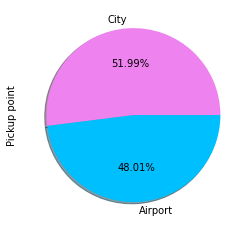

In [12]:
#Pickup point
uber_df['Pickup point'].value_counts().plot.pie(colors=['violet','deepskyblue'],
                                                autopct='%1.2f%%',shadow=True)
plt.show()

#### Analysis on Pickup point:
- The pickup points in this data are airport and city.
- From the pie chart we can infer that:
    1. Number of requests made are slightly more in city 
than it is at the airport.

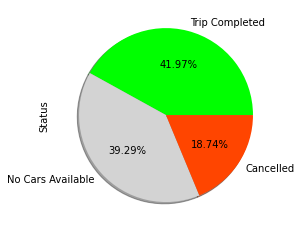

In [13]:
#Status
uber_df['Status'].value_counts().plot.pie(colors=['lime','lightgrey','orangered'],
                                                autopct='%1.2f%%',shadow=True)
plt.show()

#### Analysis on Status of request:
- The Status of requests are categorized as trip 
completed, cancelled and no cars available.
- From the pie chart we can infer that:
    1. Not even 50% of requests made are completed
    2. Car’s unavailability contribution is significant. 

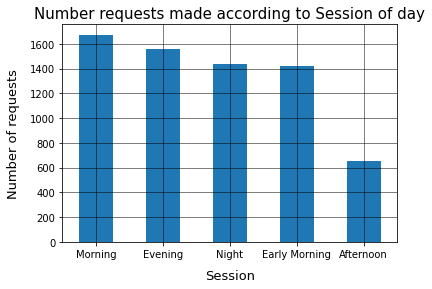

In [14]:
#Session
plt.title('Number requests made according to Session of day',fontsize=15)
uber_df['Session'].value_counts().plot.bar()
plt.xticks(rotation=360)
plt.xlabel('Session',labelpad=10,fontsize=13)
plt.ylabel('Number of requests',labelpad=10,fontsize=13)
plt.grid(True,lw=0.5,color='k')
plt.show()

#### Analysis on Session at which requests were made:
- Barplot shows amount of requests 
made according to the categorized sessions
- Its observed that mostly cab requests are made 
in hours 0-11 and in 16-23

### Bivariate analysis 


#### 1. pickup point, session and average time at which request is made

In [15]:
# Creating pivot table.
dt2=uber_df.pivot_table(uber_df,index='Pickup point',
                        columns='Session',aggfunc={'Request_hr':np.size})
dt2

Request_hr                                    
Session       Afternoon Early Morning Evening Morning Night
Pickup point                                               
Airport             278           434    1140     384  1002
City                373           987     420    1290   437

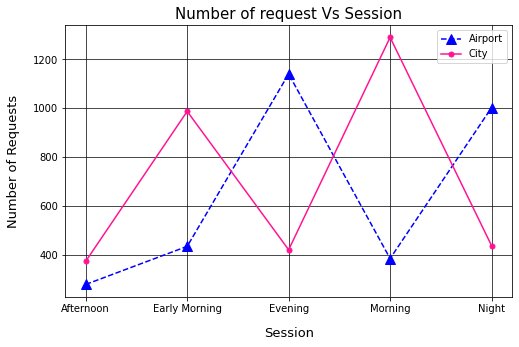

In [16]:
#Create groupby for above pivot table
df_airport=uber_df[uber_df['Pickup point']=='Airport'].groupby(by='Session',axis=0)['Request_hr'].count()
df_city=uber_df[uber_df['Pickup point']=='City'].groupby(by='Session',axis=0)['Request_hr'].count()

#plotting above data
plt.figure(figsize=(8,5))
plt.plot(df_airport,label='Airport',marker='^',ms=10,ls='--',color='blue')
plt.plot(df_city,label='City',marker='o',ms=5,color='deeppink')
plt.title('Number of request Vs Session',fontsize=15)
plt.grid(True,lw=0.7,color='k')
plt.legend()
plt.xlabel('Session',fontsize=13,labelpad=13)
plt.ylabel('Number of Requests',fontsize=13,labelpad=13)
plt.show()



#### 2. Boxplot for Request_hr Vs Session

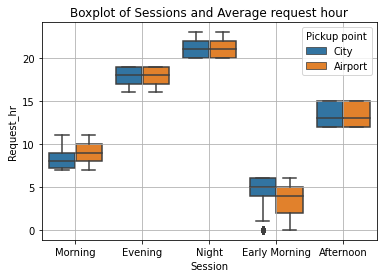

In [17]:
sns.boxplot(data=uber_df,x='Session',y='Request_hr',
            hue='Pickup point',hue_order=['City','Airport'])
plt.title('Boxplot of Sessions and Average request hour')
plt.grid(True)

### Multivariate analysis

#### 1. Number of requests at pickup points and status of request

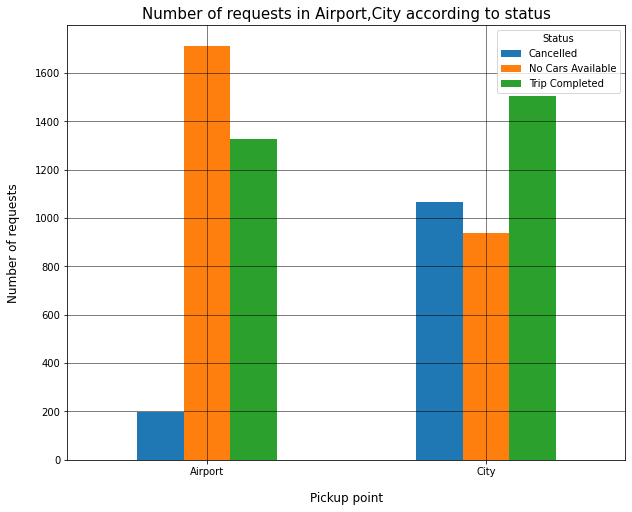

In [18]:
#pickuppoint and Status
dt1=pd.crosstab(uber_df['Pickup point'],uber_df['Status'])
dt1.plot(kind='bar',figsize=(10,8))

plt.title('Number of requests in Airport,City according to status',fontsize=15)
plt.grid(True,lw=.5,color='k')
plt.ylabel('Number of requests',labelpad=15,fontsize=12)
plt.xlabel('Pickup point',labelpad=15,fontsize=12)
plt.xticks(rotation=360)
plt.show()

#### Analysis on the number requests made at the pickup point and their status: 
1. Cancelled requests are large in city and very few at 
airport.
2. The case of unavailability of cabs is much significant 
at airport than at city.
3. Both airport and city trips combined contribute to 
about 42% completed trips.

#### 2. Number of requests made according to sessions and status of the request (for AIRPORT)

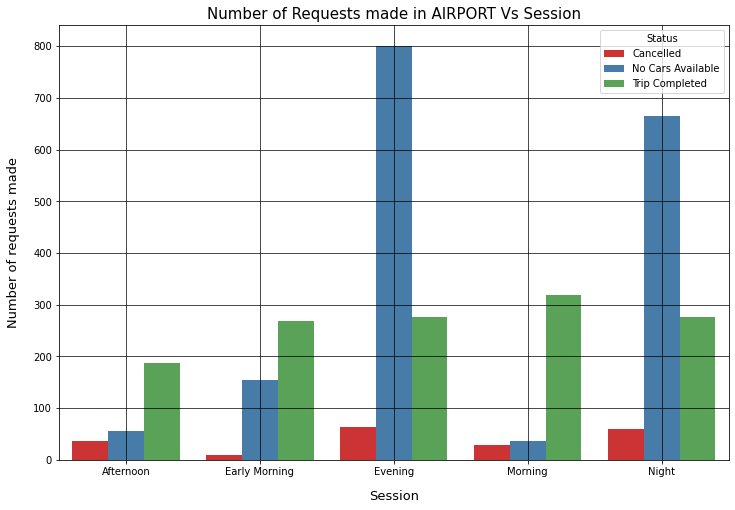

In [19]:
#Number of requests made and their status according to Session in case of AIRPORT 
dt3=uber_df[uber_df['Pickup point']=='Airport'].groupby(by=['Status','Session'])['Request_hr'].count().reset_index()

#Create bar plot
plt.figure(figsize=(12,8))
sns.barplot(data=dt3,x='Session',y='Request_hr',
            hue='Status',palette='Set1')
plt.grid(True,lw=0.7,color='k')
plt.title('Number of Requests made in AIRPORT Vs Session',fontsize=15)
plt.xlabel('Session',labelpad=13,fontsize=13)
plt.ylabel('Number of requests made',labelpad=13,fontsize=13)
plt.show()

#### Analysis on number of requests made and status of request at airport during the working sessions:
1. In case of cancellation, among the few requests 
cancelled mostly are denied during evening.
2. In case of car unavailability, evening session 
contributes largest then comes night session.
3. Fewer trips being completed from airport must be 
the effect car unavailability. 

#### 3. Number of requests made according to sessions and status of the request (for CITY)

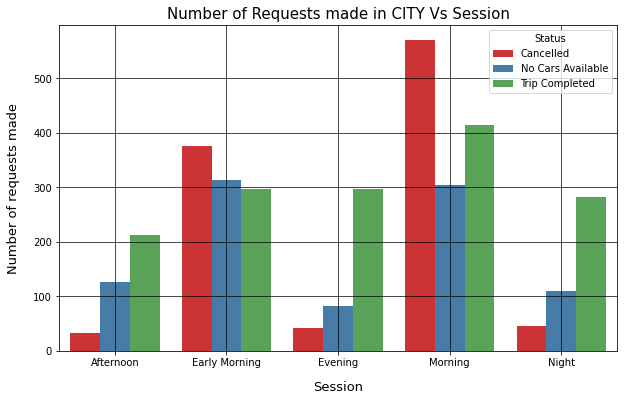

In [20]:
#Number of requests made and their status according to Session in case of CITY 
dt3=uber_df[uber_df['Pickup point']=='City'].groupby(by=['Status','Session'])['Request_hr'].count().reset_index()

#Create bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=dt3,x='Session',y='Request_hr',
            hue='Status',palette='Set1')
plt.grid(True,lw=0.7,color='k')
plt.title('Number of Requests made in CITY Vs Session',fontsize=15)
plt.xlabel('Session',labelpad=13,fontsize=13)
plt.ylabel('Number of requests made',labelpad=13,fontsize=13)
plt.show()

#### Analysis on number of requests made and status of request in city during the working sessions:
1. Cancellation of requests occurs in the time range of 
0-11.
2. Car unavailability issue is less as compared to that in 
airport

#### 4. Number of requests made during the 5 days and staus of the request (for CITY)

In [21]:
#relation between day of trip and count of Status
df_city=uber_df[uber_df['Pickup point']=='City']
dt4=df_city.groupby(['Day_of_trip','Status'])['Request_hr'].count().reset_index()
dt4




,Day_of_trip,Status,Request_hr
0,11,Cancelled,220
1,11,No Cars Available,166
2,11,Trip Completed,320
3,12,Cancelled,195
4,12,No Cars Available,155
5,12,Trip Completed,273
6,13,Cancelled,222
7,13,No Cars Available,173
8,13,Trip Completed,279
9,14,Cancelled,220


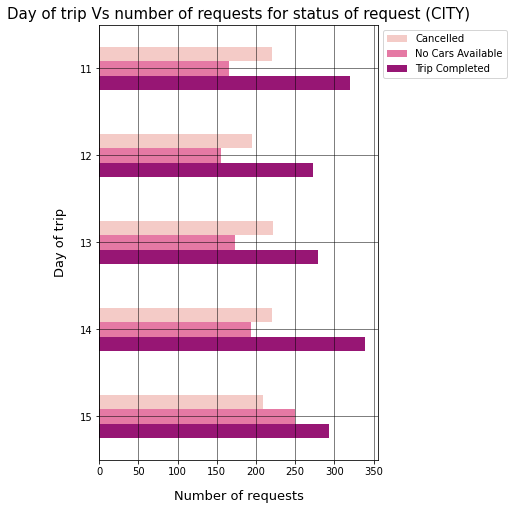

In [22]:
#Creating plot for above data
plt.figure(figsize=(5,8))
sns.barplot(data=dt4,x='Request_hr',y='Day_of_trip',hue='Status',
            palette='RdPu',orient='h',width=0.5)
plt.title('Day of trip Vs number of requests for status of request (CITY)',fontsize=15)
plt.xlabel('Number of requests',labelpad=13,fontsize=13)
plt.ylabel('Day of trip',labelpad=13,fontsize=13)
plt.grid(True,lw=0.5,color='k')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

#### Analysis on the number of requests made in city on the specific days given in data classified on the basis of status of those requests:

1. Almost same number of requests are made everyday.
2. Cancelled requests are lowest on 12th day of trip and 
lies in almost the same interval for other days. 
3. Car unavailability issue seems to be rising in the span 
of given 5 days

#### 4. Number of requests made during the 5 days and staus of the request (for AIRPORT)

In [23]:
#relation between day of trip and count of Status (AIRPORT)
df_airport=uber_df[uber_df['Pickup point']=='Airport']
dt5=df_airport.groupby(['Day_of_trip','Status'])['Request_hr'].count().reset_index()
dt5


,Day_of_trip,Status,Request_hr
0,11,Cancelled,42
1,11,No Cars Available,338
2,11,Trip Completed,281
3,12,Cancelled,45
4,12,No Cars Available,350
5,12,Trip Completed,289
6,13,Cancelled,48
7,13,No Cars Available,317
8,13,Trip Completed,298
9,14,Cancelled,32


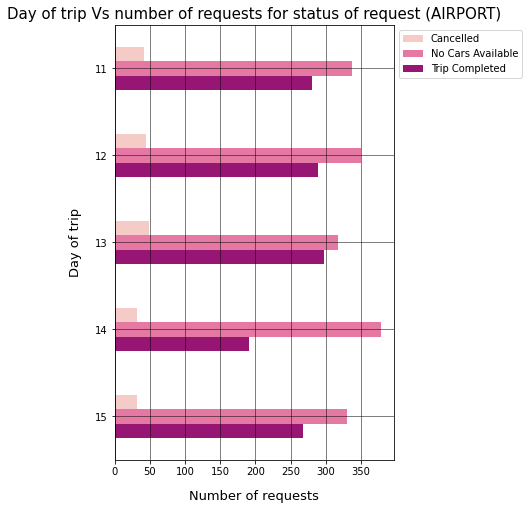

In [24]:
#Creating plot for above data
plt.figure(figsize=(5,8))
sns.barplot(data=dt5,x='Request_hr',y='Day_of_trip',hue='Status',
            palette='RdPu',orient='h',width=0.5)
plt.title('Day of trip Vs number of requests for status of request (AIRPORT)',fontsize=15)
plt.xlabel('Number of requests',labelpad=13,fontsize=13)
plt.ylabel('Day of trip',labelpad=13,fontsize=13)
plt.grid(True,lw=0.5,color='k')
plt.legend(bbox_to_anchor=(1,1))
plt.show()


#### Analysis on the number of requests made at airport on the specific days given in data classified on the basis of status of those requests.
1. Number of requests are lower on 14th ,15th day
2. Cancellation of requests seems to be of not much of 
an issue in case of airport, everyday below 50 requests 
are cancelled.
3. Car unavailability is significant and peaks on 14th day.
4. Total trips completed in 5 days are less than the total 
requests which are not completed due to unavailability 
of cars. 

### Proposed Solution:
1. As the demand for cab requests are almost same at both pickup points, Uber should hire more number of drivers.
2. Uber can put a criteria on the number of cabs available during the sessions.
3. Uber can provide special incentives to drivers who completes a specific numbers trips in specific sessions, which 
could tackle the cab cancellation issue.
4. Uber can start new service dedicated to airport rides

## -----------------------------------------------------END------------------------------------------------------------